Max transfer time for env S2_C2_N50 :     240.171735
Average transfer time for env S2_C2_N50 : 123.95633602424242
Min transfer time for env S2_C2_N50 :     76.467803


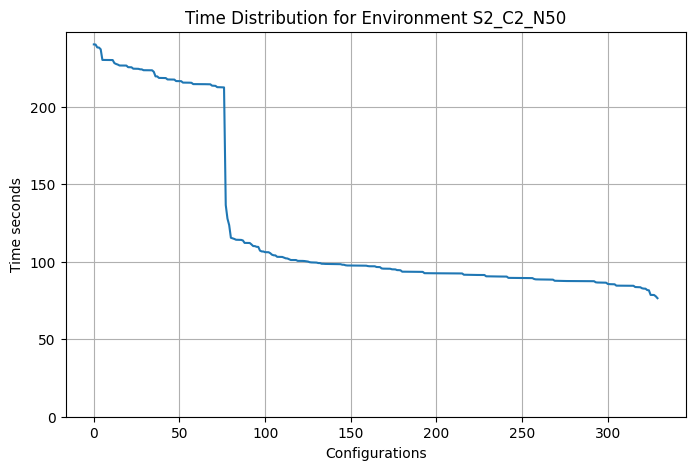

Max transfer time for env S2_C8_N50 :     241.113713
Average transfer time for env S2_C8_N50 : 123.96208059516616
Min transfer time for env S2_C8_N50 :     78.472798


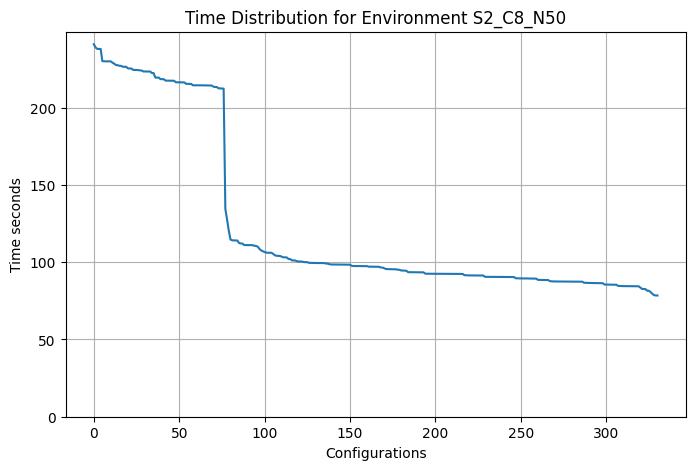

Max transfer time for env S4_C16_N50 :     233.12543
Average transfer time for env S4_C16_N50 : 119.54820756307693
Min transfer time for env S4_C16_N50 :     67.523162


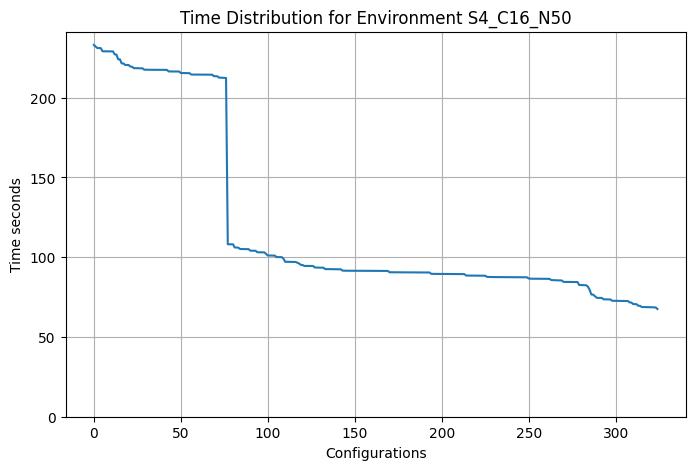

Max transfer time for env S8_C8_N50 :     231.134075
Average transfer time for env S8_C8_N50 : 118.74726625925926
Min transfer time for env S8_C8_N50 :     67.448326


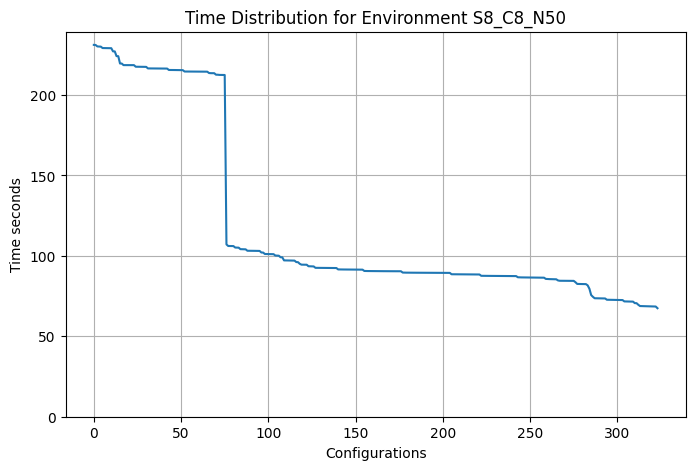

Max transfer time for env S8_C2_N50 :     231.193604
Average transfer time for env S8_C2_N50 : 119.07563827076923
Min transfer time for env S8_C2_N50 :     67.557176


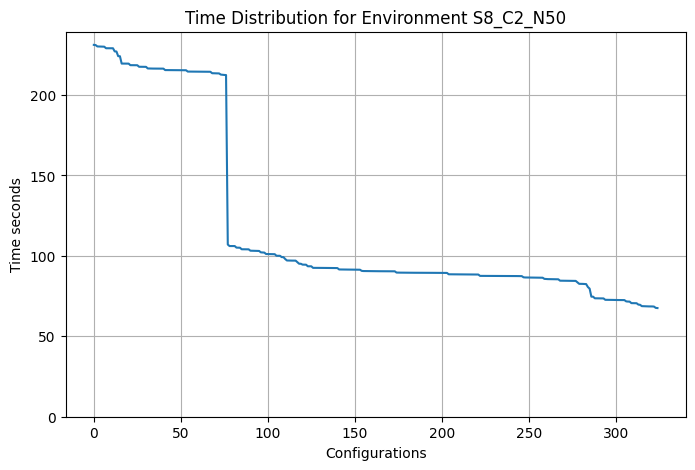

Max transfer time for env S16_C4_N50 :     231.148686
Average transfer time for env S16_C4_N50 : 118.92113979738562
Min transfer time for env S16_C4_N50 :     68.465487


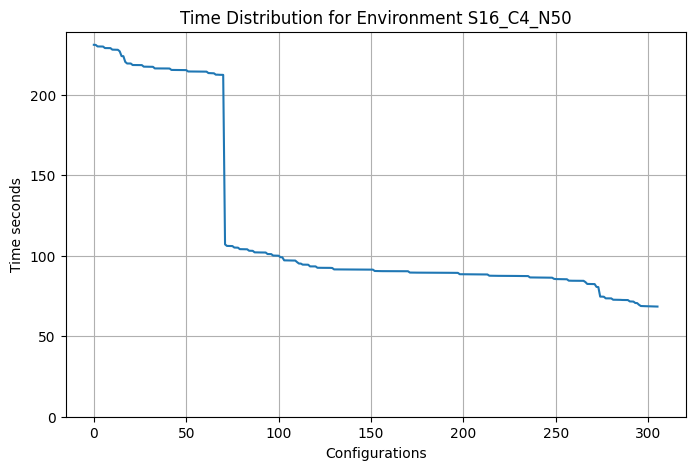

Max transfer time for env S16_C16_N50 :     231.071327
Average transfer time for env S16_C16_N50 : 118.61484884918033
Min transfer time for env S16_C16_N50 :     67.460177


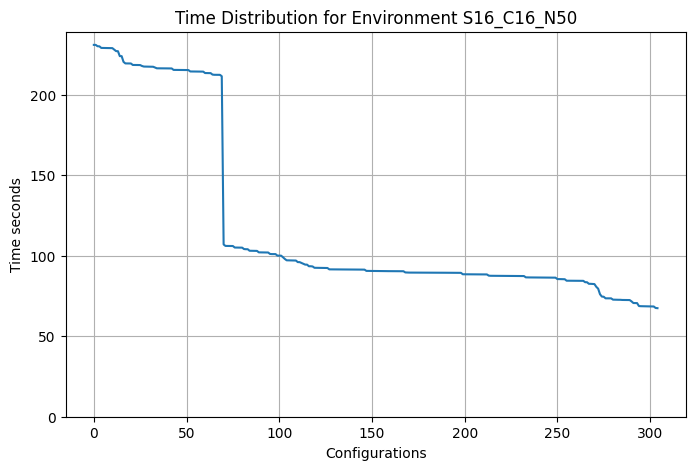

Max transfer time for env S16_C8_N50 :     232.081989
Average transfer time for env S16_C8_N50 : 118.58111167868853
Min transfer time for env S16_C8_N50 :     67.542046


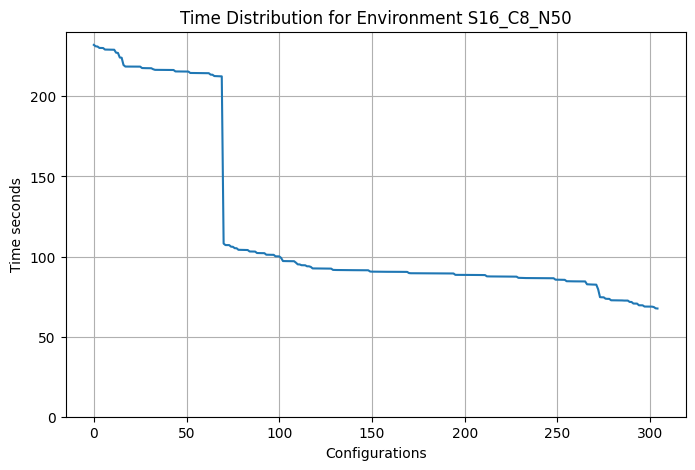

Max transfer time for env S2_C2_N150 :     132.685535
Average transfer time for env S2_C2_N150 : 78.65063713479624
Min transfer time for env S2_C2_N150 :     50.459156


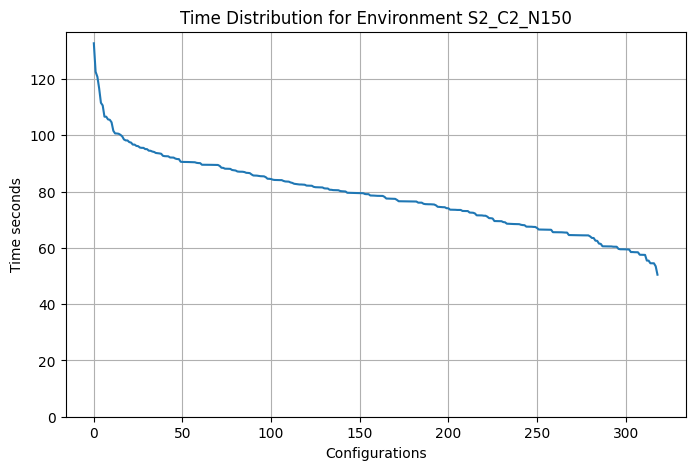

Max transfer time for env S2_C8_N150 :     132.62917
Average transfer time for env S2_C8_N150 : 78.57689291798107
Min transfer time for env S2_C8_N150 :     51.445857


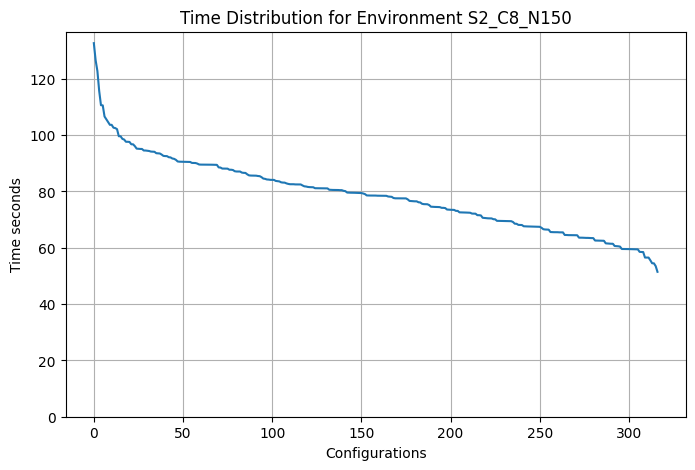

Max transfer time for env S4_C16_N150 :     97.613962
Average transfer time for env S4_C16_N150 : 55.55524103134796
Min transfer time for env S4_C16_N150 :     32.473526


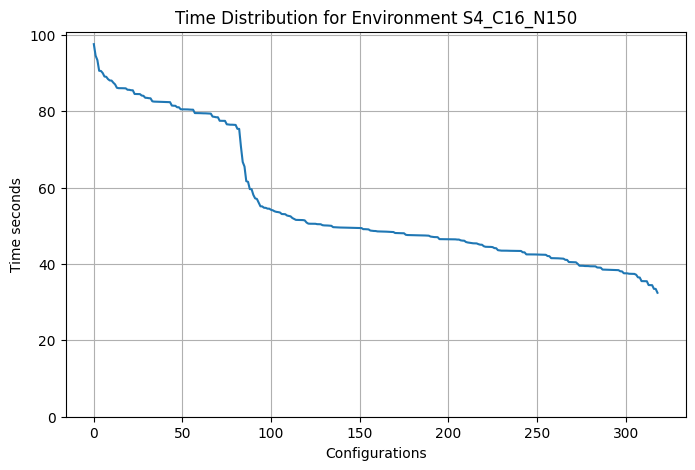

Max transfer time for env S8_C8_N150 :     94.576122
Average transfer time for env S8_C8_N150 : 53.65590546601942
Min transfer time for env S8_C8_N150 :     28.680814


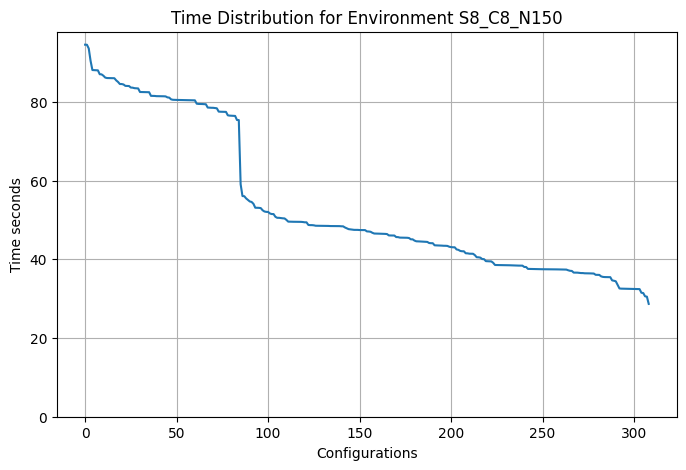

Max transfer time for env S8_C2_N150 :     94.568156
Average transfer time for env S8_C2_N150 : 53.5448701980198
Min transfer time for env S8_C2_N150 :     30.675865


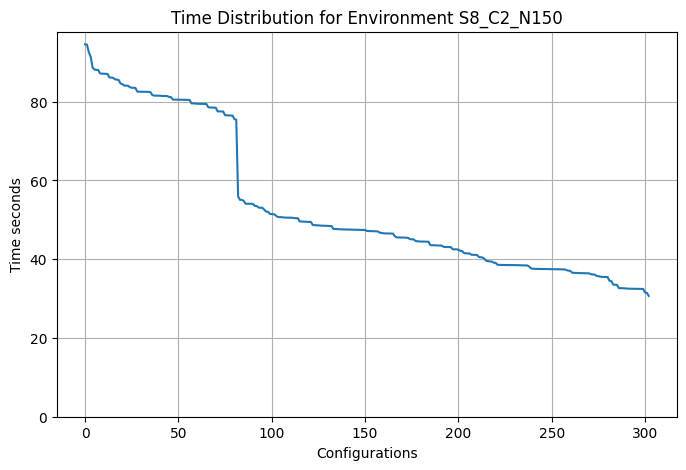

Max transfer time for env S16_C4_N150 :     95.541265
Average transfer time for env S16_C4_N150 : 53.25835596721311
Min transfer time for env S16_C4_N150 :     28.668132


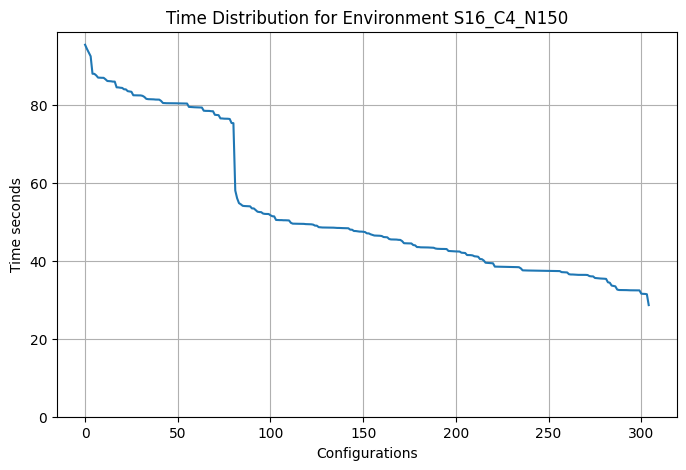

Max transfer time for env S16_C16_N150 :     98.628341
Average transfer time for env S16_C16_N150 : 53.45725684090909
Min transfer time for env S16_C16_N150 :     28.636195


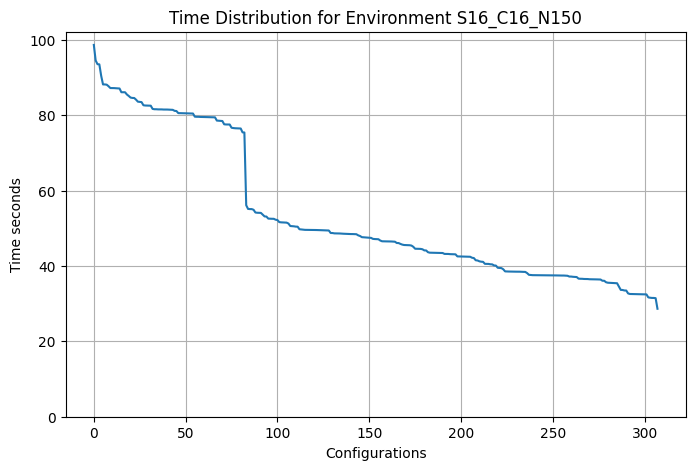

Max transfer time for env S16_C8_N150 :     94.585874
Average transfer time for env S16_C8_N150 : 53.460395170418
Min transfer time for env S16_C8_N150 :     29.644251


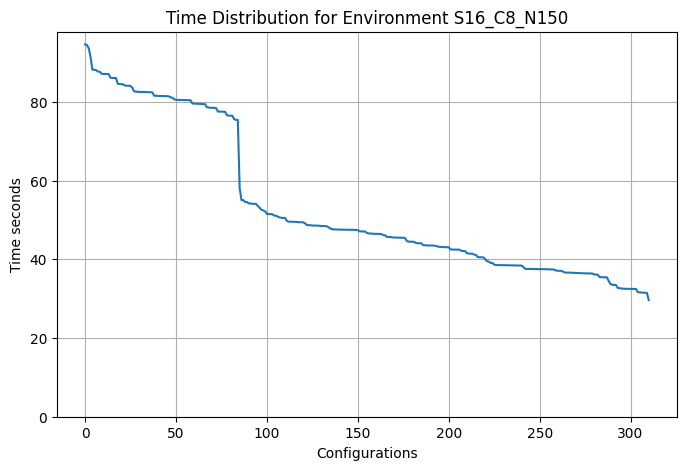

Max transfer time for env S2_C2_N1000 :     130.65463
Average transfer time for env S2_C2_N1000 : 72.90083804658386
Min transfer time for env S2_C2_N1000 :     43.523001


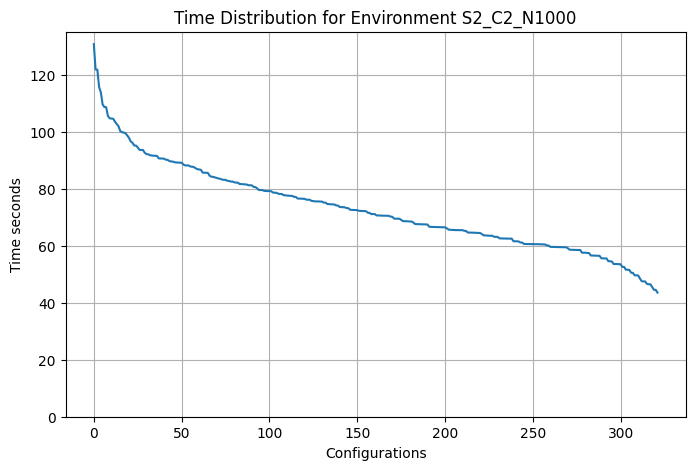

Max transfer time for env S2_C8_N1000 :     131.716036
Average transfer time for env S2_C8_N1000 : 72.89724843925234
Min transfer time for env S2_C8_N1000 :     43.464427


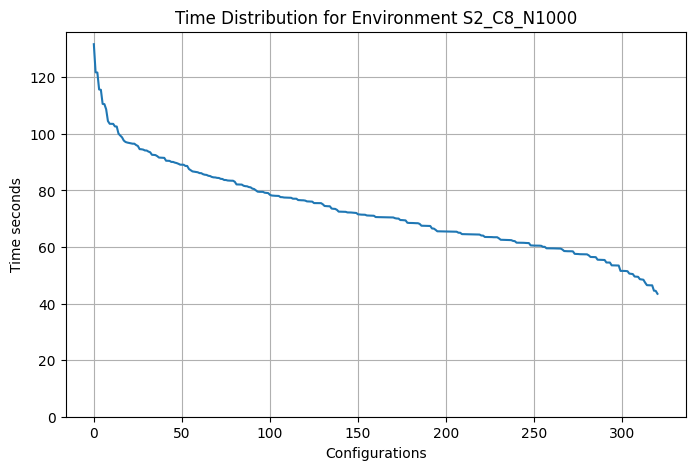

Max transfer time for env S4_C16_N1000 :     95.519085
Average transfer time for env S4_C16_N1000 : 46.59133560191083
Min transfer time for env S4_C16_N1000 :     29.496571


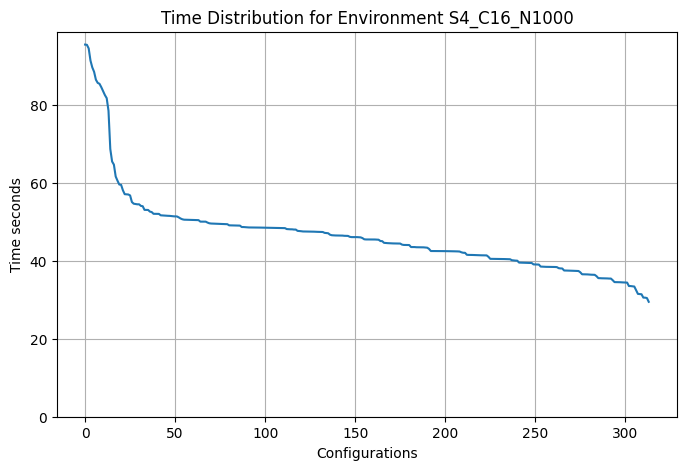

Max transfer time for env S8_C8_N1000 :     93.560617
Average transfer time for env S8_C8_N1000 : 41.934923272435896
Min transfer time for env S8_C8_N1000 :     20.514481


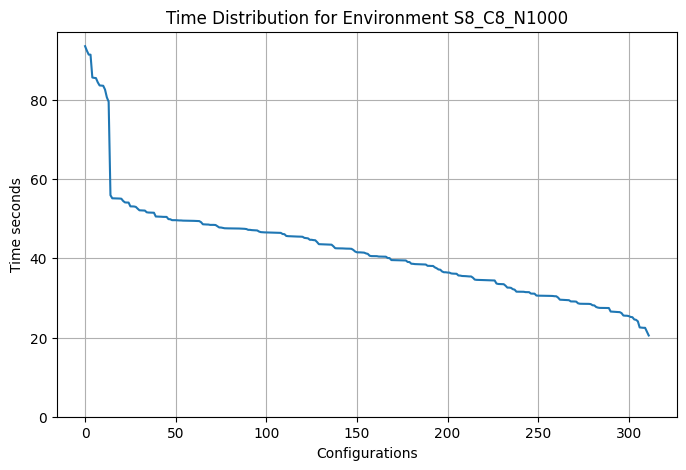

Max transfer time for env S8_C2_N1000 :     94.561632
Average transfer time for env S8_C2_N1000 : 42.54510181333333
Min transfer time for env S8_C2_N1000 :     22.468923


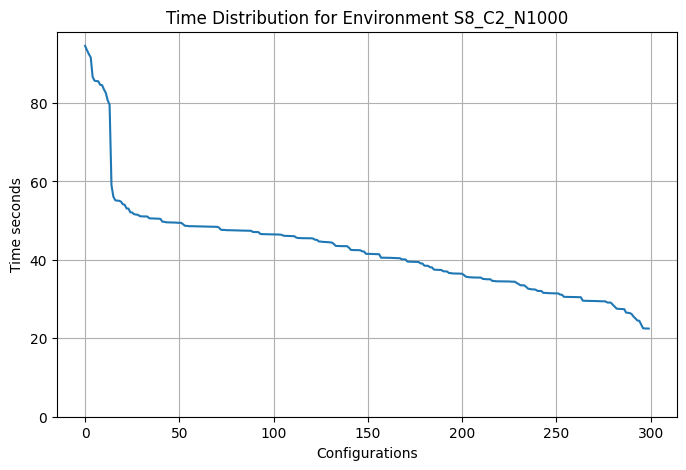

Max transfer time for env S16_C8_N1000 :     94.399884
Average transfer time for env S16_C8_N1000 : 41.51603127009646
Min transfer time for env S16_C8_N1000 :     20.492702


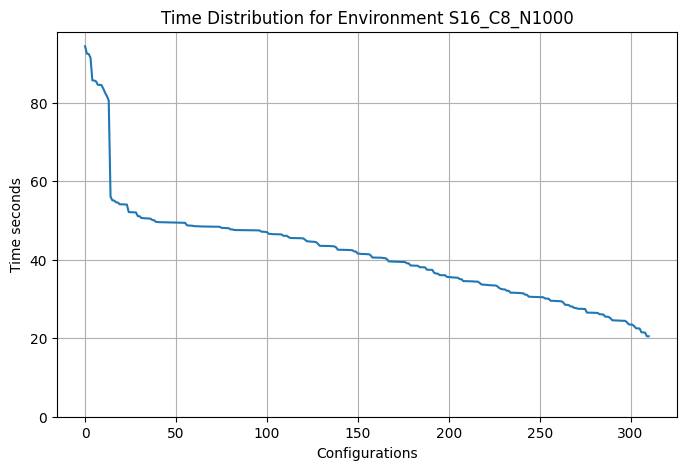

Max transfer time for env S16_C4_N1000 :     94.574307
Average transfer time for env S16_C4_N1000 : 41.41766361980831
Min transfer time for env S16_C4_N1000 :     20.455352


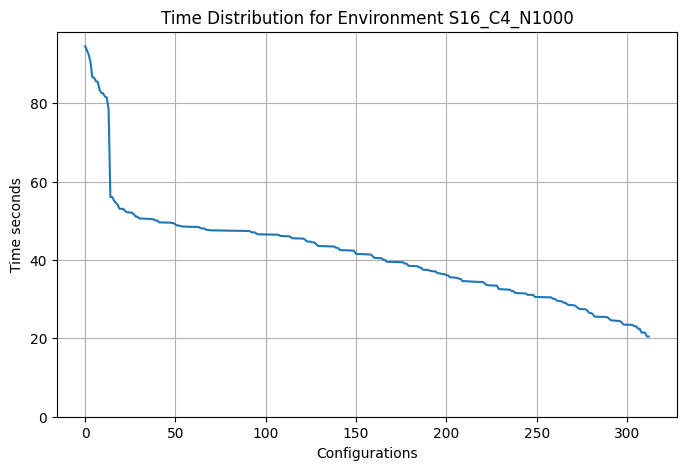

Max transfer time for env S16_C16_N1000 :     94.442811
Average transfer time for env S16_C16_N1000 : 41.544216166666665
Min transfer time for env S16_C16_N1000 :     20.475619


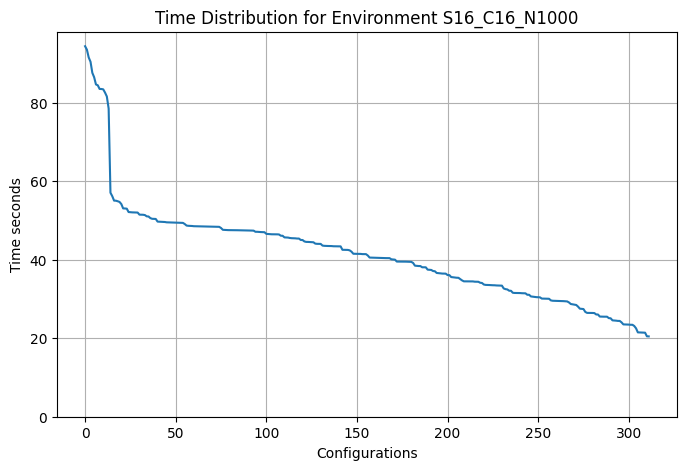

In [65]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

import glob
import pandas as pd
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt

def get_file_list(base_path, signatures):
    """Generate file lists for the given base path and environment signatures."""
    return [glob.glob(f"{base_path}/{signature}_random_sample*.csv") for signature in signatures]

def load_and_filter_data(file_list, max_config_id, time_threshold=2):
    """Load and filter data based on time and config_id."""
    data_frames = []
    for file in file_list:
        df = pd.read_csv(file)
        df = df[(df['time'] > time_threshold) & (df['config_id'] < max_config_id)]
        data_frames.append(df)
    return pd.concat(data_frames, axis=0, ignore_index=True) if data_frames else pd.DataFrame()

BASE_PATH = "C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_1310k"


ENV_SIGNATURES_NEW_BASE_ENVS = [
    "S2_C2_N50","S2_C8_N50",
    "S4_C16_N50",
    "S8_C8_N50","S8_C2_N50",
    "S16_C4_N50","S16_C16_N50", "S16_C8_N50",
    "S2_C2_N150","S2_C8_N150",
    "S4_C16_N150",
    "S8_C8_N150","S8_C2_N150",
    "S16_C4_N150","S16_C16_N150", "S16_C8_N150",
    "S2_C2_N1000","S2_C8_N1000",
    "S4_C16_N1000",
    "S8_C8_N1000","S8_C2_N1000", "S16_C8_N1000",
    "S16_C4_N1000","S16_C16_N1000"
]


env_lists = {
    #"SCALE_COMPUTE": ENV_SIGNATURES_SCALE_COMPUTE,
    #"SCALE_NETWORK": ENV_SIGNATURES_SCALE_NETWORK,
    "NEW_BASE":ENV_SIGNATURES_NEW_BASE_ENVS,
    #"ALL_ORIG": ENV_SIGNATURES_ALL,
    #"TRUE_ALL": list(set(ENV_SIGNATURES_SCALE_NETWORK).union(ENV_SIGNATURES_SCALE_COMPUTE, ENV_SIGNATURES_ALL))
    #"SCALE_BOTH": list(set(ENV_SIGNATURES_SCALE_NETWORK).union(ENV_SIGNATURES_SCALE_COMPUTE))
}

for name, env_list in env_lists.items():
    
    file_lists = get_file_list(BASE_PATH, env_list)
    df_heatmap = pd.DataFrame(0, index=env_list, columns=env_list, dtype=float)
    
    N = 66
    for i, file_list in enumerate(file_lists):

        env = ""
        algo = ""
    
        all_data = pd.DataFrame()
        list_single_dfs_1310k = []
    
        for file in file_list:
    
            env = file.split("/")[-1].split("\\")[1].split("_random")[0]
            algo = file.split("\\")[-2]
    
            df = pd.read_csv(file)
            df = df[df['time'] > 1]
    
            df = df[df['config_id'] < 500]
    
            list_single_dfs_1310k.append(df)
            
        all_data = pd.concat(list_single_dfs_1310k, axis=0, ignore_index=True)
    
        all_data = all_data.sort_values(by='time',ascending=False).reset_index()
        
        
        print(f"Max transfer time for env {env} :     {all_data['time'].max()}")
        print(f"Average transfer time for env {env} : {statistics.mean(all_data['time'])}")
        print(f"Min transfer time for env {env} :     {all_data['time'].min()}")
        
        plt.figure(figsize=(8, 5))
        
        plt.plot(all_data['time'])
        plt.grid()
        plt.xlabel('Configurations')
        plt.ylabel('Time seconds')
        plt.ylim(bottom=0)
        plt.title(f"Time Distribution for Environment {env}")# and Algorithm {algo}")
        plt.show()

In [ ]:

for file in file_list:
    try:

        df = pd.read_csv(file)
        df = df[df['time'] > 0]
          
        
        env = file.split("/")[-1].split("\\")[-3]
        algo = file.split("\\")[-2]

        print(f"Env :{env}  Samples  {len(df[df['time'].notna()])}")
    
    except:
        pass


In [133]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from datetime import datetime, timedelta
import glob
import pandas as pd
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt

def get_file_list(base_path, signatures):
    """Generate file lists for the given base path and environment signatures."""
    return [glob.glob(f"{base_path}/{signature}_random_sample*.csv") for signature in signatures]

def load_and_filter_data(file_list, max_config_id, time_threshold=2):
    """Load and filter data based on time and config_id."""
    data_frames = []
    for file in file_list:
        df = pd.read_csv(file)
        df = df[(df['time'] > time_threshold) & (df['config_id'] < max_config_id)]
        data_frames.append(df)
    return pd.concat(data_frames, axis=0, ignore_index=True) if data_frames else pd.DataFrame()

BASE_PATH = "C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_1310k"



ENV_SIGNATURES_NEW_BASE_ENVS = [
    "S2_C2_N50","S2_C8_N50","S4_C16_N50",
    "S8_C8_N50","S8_C2_N50",
    "S16_C4_N50","S16_C16_N50", "S16_C8_N50",
    
    "S2_C2_N150","S2_C8_N150","S4_C16_N150",
    "S8_C8_N150","S8_C2_N150",
    "S16_C4_N150","S16_C16_N150", "S16_C8_N150",
    
    "S2_C2_N1000","S2_C8_N1000","S4_C16_N1000",
    "S8_C8_N1000","S8_C2_N1000", "S16_C8_N1000",
    "S16_C4_N1000","S16_C16_N1000",

]


env_lists = {
    #"SCALE_COMPUTE": ENV_SIGNATURES_SCALE_COMPUTE,
    #"SCALE_NETWORK": ENV_SIGNATURES_SCALE_NETWORK,
    "NEW_BASE":ENV_SIGNATURES_NEW_BASE_ENVS
}
total_count = 0
total_seconds = 0
for name, env_list in env_lists.items():
    
    file_lists = get_file_list(BASE_PATH, env_list)
    df_heatmap = pd.DataFrame(0, index=env_list, columns=env_list, dtype=float)
    
    N = 66
    for i, file_list in enumerate(file_lists):

        env = ""
        algo = ""
    
        all_data = pd.DataFrame()
        list_single_dfs_1310k = []
    
        for file in file_list:
    
            
            df = pd.read_csv(file)
            true_count = len(df)

            df = df[df['time'] > 0]
            env = file.split("/")[-1].split("\\")[-1].replace("_random_samples.csv","")

            avg = statistics.mean(df['time'])
            count = len(df[df['time'].notna()])

            goal = 325
            missing_count = (goal - true_count)
            seconds = avg * missing_count
            
            if seconds < 0 : 
                seconds = 0
                missing_count = 0
                
            total_seconds = total_seconds + seconds + (15 * missing_count)

            print(f"Env : {env}  Samples  {true_count} ({count} -> {true_count - count})   missing to {goal} : {missing_count} , avg = {avg:.1f}s, est. time = {seconds:.1f}s")

            total_count = total_count + count

print(f"Total Sample Count : {total_count}")
print(f"\nTotal Seconds : {total_seconds}")  
print(f"Total Minutes : {total_seconds / 60}") 
print(f"Total Hours : {total_seconds / 60 / 60}") 
print(f"Total Hours / 3 : {total_seconds / 60 / 60 / 3}") 


current_time = datetime.now()
hours_to_add = total_seconds / 60 / 60 / 3
hours = int(hours_to_add)
minutes = int((hours_to_add - hours) * 60)
time_delta = timedelta(hours=hours, minutes=minutes)
new_time = current_time + time_delta

print("Current time:            ", current_time.strftime("%Y-%m-%d %H:%M:%S"))
print("Estimated finishing time:", new_time.strftime("%Y-%m-%d %H:%M:%S"))
# 24 * 150 = 3600
# 24 * 200 = 4800
# 24 * 210 = 5040

Env : S2_C2_N50  Samples  350 (330 -> 20)   missing to 325 : 0 , avg = 124.0s, est. time = 0.0s
Env : S2_C8_N50  Samples  350 (331 -> 19)   missing to 325 : 0 , avg = 124.0s, est. time = 0.0s
Env : S4_C16_N50  Samples  350 (325 -> 25)   missing to 325 : 0 , avg = 119.5s, est. time = 0.0s
Env : S8_C8_N50  Samples  350 (324 -> 26)   missing to 325 : 0 , avg = 118.7s, est. time = 0.0s
Env : S8_C2_N50  Samples  348 (325 -> 23)   missing to 325 : 0 , avg = 119.1s, est. time = 0.0s
Env : S16_C4_N50  Samples  325 (306 -> 19)   missing to 325 : 0 , avg = 118.9s, est. time = 0.0s
Env : S16_C16_N50  Samples  325 (305 -> 20)   missing to 325 : 0 , avg = 118.6s, est. time = 0.0s
Env : S16_C8_N50  Samples  325 (305 -> 20)   missing to 325 : 0 , avg = 118.6s, est. time = 0.0s
Env : S2_C2_N150  Samples  325 (319 -> 6)   missing to 325 : 0 , avg = 78.7s, est. time = 0.0s
Env : S2_C8_N150  Samples  325 (317 -> 8)   missing to 325 : 0 , avg = 78.6s, est. time = 0.0s
Env : S4_C16_N150  Samples  325 (319 

In [446]:
# 16:53 -> 21:11
# 17:13 -> 21:20
# 17:23 -> 21:23
# 19:00 -> 22:06
# 19:25 -> 22:11
# 20:04 -> 22:19
# 21:00 -> 22:41
# changed to 210 :
# 21:07 -> 11:40
# 22:00 -> 11:50
# 07:37 -> 14:22 ---  9:40 + 2:32 -> 0,25 + pro Stunde Zeit
# after deleting false dummy timout reported times
# 08:01 -> 14:07 ---  10:00 + 2:17 -> 0,23 + pro Stunde Zeit
# 08:51 -> 14:39
# 13:15 -> 15:46

In [13]:
import glob
import pandas as pd
import numpy as np
import yaml
from datetime import datetime, timedelta
import glob
import pandas as pd
import pandas as pd
from collections import Counter

def get_file_list(base_path, signatures):
    """Generate file lists for the given base path and environment signatures."""
    return [glob.glob(f"{base_path}/{signature}_random_sample*.csv") for signature in signatures]

def load_and_filter_data(file_list, max_config_id, time_threshold=2):
    """Load and filter data based on time and config_id."""
    data_frames = []
    for file in file_list:
        df = pd.read_csv(file)
        df = df[(df['time'] > time_threshold) & (df['config_id'] < max_config_id)]
        data_frames.append(df)
    return pd.concat(data_frames, axis=0, ignore_index=True) if data_frames else pd.DataFrame()

BASE_PATH = "C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_1310k"



ENV_SIGNATURES_NEW_BASE_ENVS = [
    "S2_C2_N50","S2_C8_N50","S4_C16_N50",
    "S8_C8_N50","S8_C2_N50",
    "S16_C4_N50","S16_C16_N50", "S16_C8_N50",
    
    "S2_C2_N150","S2_C8_N150","S4_C16_N150",
    "S8_C8_N150","S8_C2_N150",
    "S16_C4_N150","S16_C16_N150", "S16_C8_N150",
    
    "S2_C2_N1000","S2_C8_N1000","S4_C16_N1000",
    "S8_C8_N1000","S8_C2_N1000", "S16_C8_N1000",
    "S16_C4_N1000","S16_C16_N1000"
]


env_lists = {
    "NEW_BASE":ENV_SIGNATURES_NEW_BASE_ENVS,
}

overall_counts = Counter()

dict_env_count = {}

for name, env_list in env_lists.items():
    file_lists = get_file_list(BASE_PATH, env_list)
    for i, file_list in enumerate(file_lists):

        for file in file_list:    
            
            df = pd.read_csv(file)
            df = df[df['run'] == -1] 
            env = file.split("/")[-1].split("\\")[-1].replace("_random_samples.csv","")

            if env not in dict_env_count.keys():
                dict_env_count[env] = 0

            dict_env_count[env] = dict_env_count[env] + len(df)
            
            value_counts = df['host'].value_counts()
            overall_counts.update(value_counts.to_dict())

overall_statistics = pd.Series(overall_counts)

overall_statistics = overall_statistics.sort_values(ascending=False)
print(overall_statistics)           

print(yaml.dump(dict_env_count))

-1                            212
cloud-8.dima.tu-berlin.de      52
cloud-7.dima.tu-berlin.de      41
cloud-9.dima.tu-berlin.de      39
cloud-10.dima.tu-berlin.de     31
dtype: int64
S16_C16_N1000: 13
S16_C16_N150: 17
S16_C16_N50: 20
S16_C4_N1000: 12
S16_C4_N150: 20
S16_C4_N50: 19
S16_C8_N1000: 14
S16_C8_N150: 14
S16_C8_N50: 20
S2_C2_N1000: 3
S2_C2_N150: 6
S2_C2_N50: 20
S2_C8_N1000: 4
S2_C8_N150: 8
S2_C8_N50: 19
S4_C16_N1000: 11
S4_C16_N150: 6
S4_C16_N50: 25
S8_C2_N1000: 25
S8_C2_N150: 22
S8_C2_N50: 23
S8_C8_N1000: 12
S8_C8_N150: 16
S8_C8_N50: 26



In [7]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from datetime import datetime, timedelta
import glob
import pandas as pd
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt

def get_file_list(base_path, signatures):
    """Generate file lists for the given base path and environment signatures."""
    return [glob.glob(f"{base_path}/{signature}_random_sample*.csv") for signature in signatures]

def load_and_filter_data(file_list, max_config_id, time_threshold=2):
    """Load and filter data based on time and config_id."""
    data_frames = []
    for file in file_list:
        df = pd.read_csv(file)
        df = df[(df['time'] > time_threshold) & (df['config_id'] < max_config_id)]
        data_frames.append(df)
    return pd.concat(data_frames, axis=0, ignore_index=True) if data_frames else pd.DataFrame()

BASE_PATH = "C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_1310k"



ENV_SIGNATURES_NEW_BASE_ENVS = [
    "S2_C2_N50","S2_C8_N50","S4_C16_N50",
    "S8_C8_N50","S8_C2_N50",
    "S16_C4_N50","S16_C16_N50", "S16_C8_N50",
    
    "S2_C2_N150","S2_C8_N150","S4_C16_N150",
    "S8_C8_N150","S8_C2_N150",
    "S16_C4_N150","S16_C16_N150", "S16_C8_N150",
    
    "S2_C2_N1000","S2_C8_N1000","S4_C16_N1000",
    "S8_C8_N1000","S8_C2_N1000", "S16_C8_N1000",
    "S16_C4_N1000","S16_C16_N1000"
]
environments_list =["S2_C2_N50",
                    "S8_C2_N50",
                    "S16_C16_N50",
                
                    "S2_C2_N150",
                    "S8_C2_N150",
                    "S16_C16_N150",
                
                    "S2_C2_N1000",
                    "S8_C2_N1000",
                    "S16_C16_N1000"]

env_lists = {
    #"SCALE_COMPUTE": ENV_SIGNATURES_SCALE_COMPUTE,
    #"SCALE_NETWORK": ENV_SIGNATURES_SCALE_NETWORK,
    #"main":environments_list,
    "NEW_BASE":ENV_SIGNATURES_NEW_BASE_ENVS,
    #"ALL_ORIG": ENV_SIGNATURES_ALL,
    #"TRUE_ALL": list(set(ENV_SIGNATURES_SCALE_NETWORK).union(ENV_SIGNATURES_SCALE_COMPUTE, ENV_SIGNATURES_ALL))
    #"SCALE_BOTH": list(set(ENV_SIGNATURES_SCALE_NETWORK).union(ENV_SIGNATURES_SCALE_COMPUTE))
}
total_count = 0
total_seconds = 0
for name, env_list in env_lists.items():
    
    file_lists = get_file_list(BASE_PATH, env_list)
    df_heatmap = pd.DataFrame(0, index=env_list, columns=env_list, dtype=float)
    
    for i, file_list in enumerate(file_lists):

        env = ""
        algo = ""
    
        all_data = pd.DataFrame()
        list_single_dfs_1310k = []
    
        for file in file_list:
    
            
            df = pd.read_csv(file)
            true_count = len(df)

            df = df[df['time'] > 0]
            env = file.split("/")[-1].split("\\")[-1].replace("_random_samples.csv","")

            avg = statistics.mean(df['time'])
            count = len(df[df['time'].notna()])

            goal =  300
            missing_count = goal
            seconds = avg * missing_count
            
            if seconds < 0 : 
                seconds = 0
                missing_count = 0
                
            total_seconds = total_seconds + seconds + (25 * missing_count)

            print(f"Env : {env}  Samples  {true_count} ({count} -> {true_count - count})   missing to {goal} : {missing_count} , avg = {avg:.1f}s, est. time = {seconds:.1f}s")

            total_count = total_count + count

print(f"Total Sample Count : {total_count}")
print(f"\nTotal Seconds : {total_seconds}")  
print(f"Total Minutes : {total_seconds / 60}") 
print(f"Total Hours : {total_seconds / 60 / 60}") 
print(f"Total Hours / 10 : {total_seconds / 60 / 60 / 10}") 


current_time = datetime.now()
hours_to_add = total_seconds / 60 / 60 / 3
hours = int(hours_to_add)
minutes = int((hours_to_add - hours) * 60)
time_delta = timedelta(hours=hours, minutes=minutes)
new_time = current_time + time_delta

print("Current time:            ", current_time.strftime("%Y-%m-%d %H:%M:%S"))
print("Estimated finishing time:", new_time.strftime("%Y-%m-%d %H:%M:%S"))
# 24 * 150 = 3600
# 24 * 200 = 4800
# 24 * 210 = 5040

Env : S2_C2_N50  Samples  350 (330 -> 20)   missing to 300 : 300 , avg = 124.0s, est. time = 37186.9s
Env : S2_C8_N50  Samples  350 (331 -> 19)   missing to 300 : 300 , avg = 124.0s, est. time = 37188.6s
Env : S4_C16_N50  Samples  350 (325 -> 25)   missing to 300 : 300 , avg = 119.5s, est. time = 35864.5s
Env : S8_C8_N50  Samples  350 (324 -> 26)   missing to 300 : 300 , avg = 118.7s, est. time = 35624.2s
Env : S8_C2_N50  Samples  348 (325 -> 23)   missing to 300 : 300 , avg = 119.1s, est. time = 35722.7s
Env : S16_C4_N50  Samples  325 (306 -> 19)   missing to 300 : 300 , avg = 118.9s, est. time = 35676.3s
Env : S16_C16_N50  Samples  325 (305 -> 20)   missing to 300 : 300 , avg = 118.6s, est. time = 35584.5s
Env : S16_C8_N50  Samples  325 (305 -> 20)   missing to 300 : 300 , avg = 118.6s, est. time = 35574.3s
Env : S2_C2_N150  Samples  325 (319 -> 6)   missing to 300 : 300 , avg = 78.7s, est. time = 23595.2s
Env : S2_C8_N150  Samples  325 (317 -> 8)   missing to 300 : 300 , avg = 78.6s

Max transfer time for env S16_C16_N1000 :     57.073417
Average transfer time for env S16_C16_N1000 : 28.3895744
Min transfer time for env S16_C16_N1000 :     15.642889


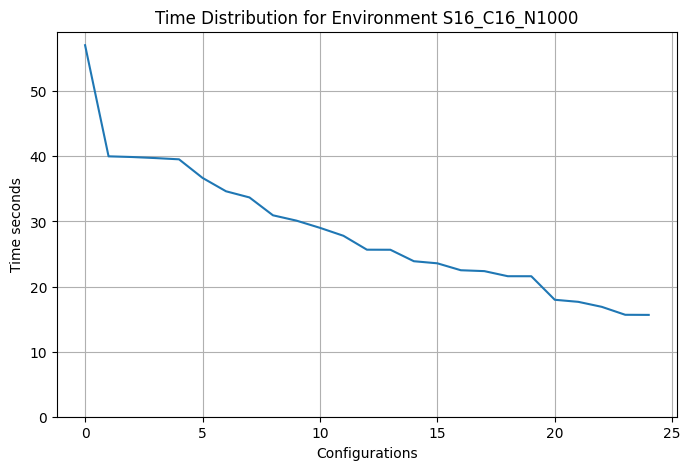

Max transfer time for env S16_C4_N1000 :     39.037112
Average transfer time for env S16_C4_N1000 : 25.03107928
Min transfer time for env S16_C4_N1000 :     13.724911


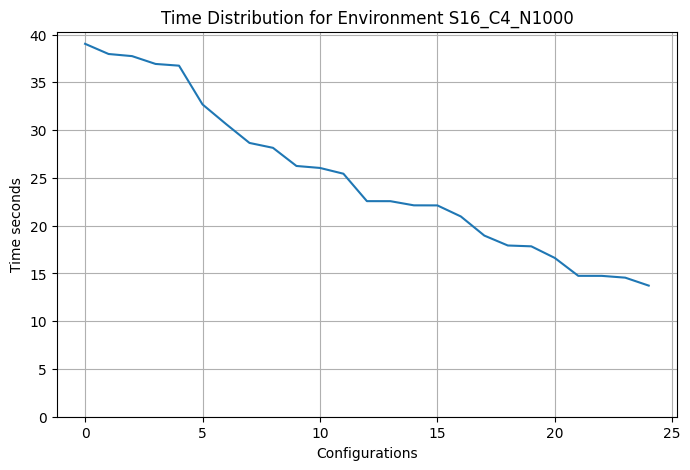

Max transfer time for env S16_C8_N1000 :     76.19395
Average transfer time for env S16_C8_N1000 : 26.0790056
Min transfer time for env S16_C8_N1000 :     10.620945


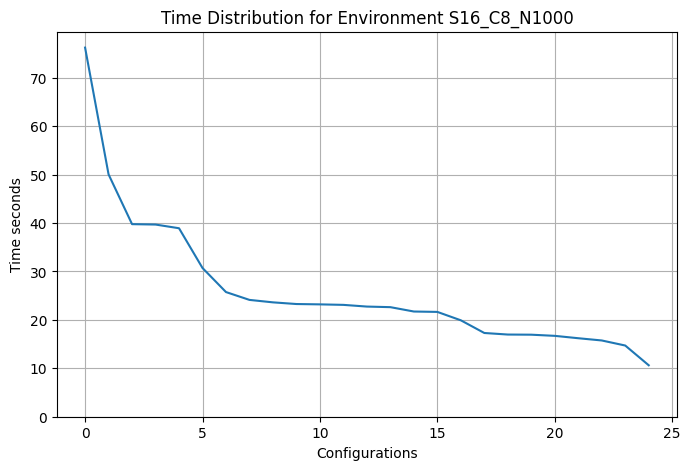

Max transfer time for env S2_C2_N50 :     264.405778
Average transfer time for env S2_C2_N50 : 167.9533464736842
Min transfer time for env S2_C2_N50 :     81.937917


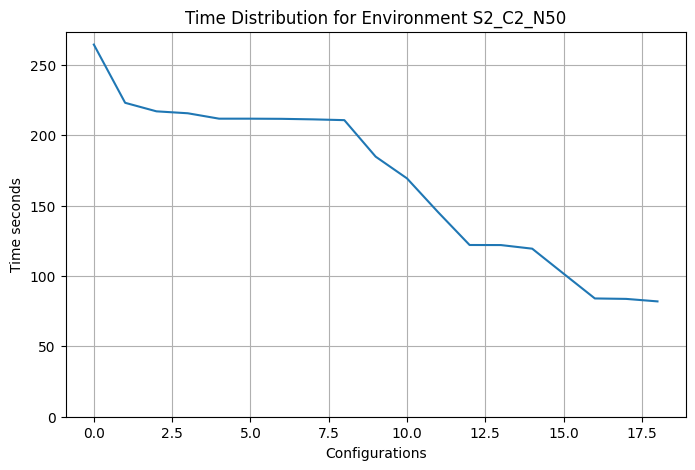

Max transfer time for env S2_C8_N50 :     222.975144
Average transfer time for env S2_C8_N50 : 153.2577752352941
Min transfer time for env S2_C8_N50 :     78.557864


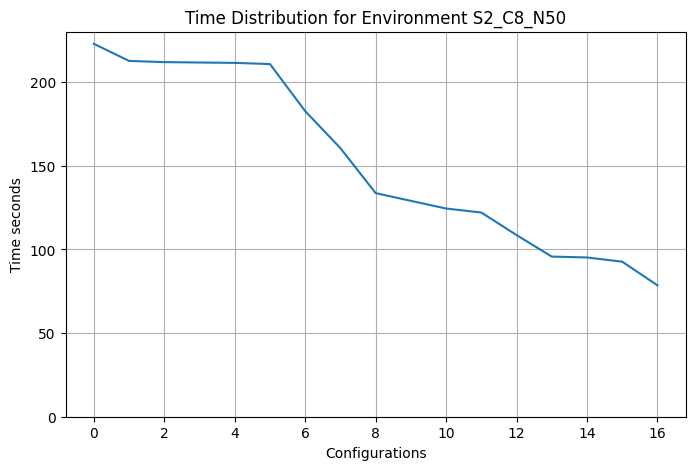

Max transfer time for env S4_C16_N50 :     700.0
Average transfer time for env S4_C16_N50 : 178.16857784615385
Min transfer time for env S4_C16_N50 :     57.593277


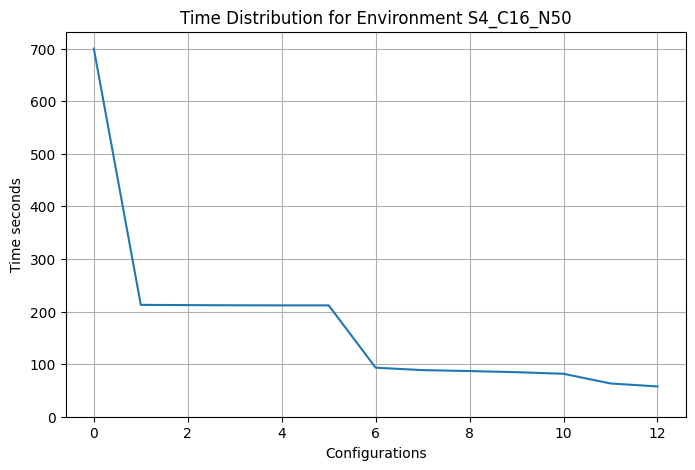

Max transfer time for env S8_C16_N150 :     77.745317
Average transfer time for env S8_C16_N150 : 42.9251258
Min transfer time for env S8_C16_N150 :     25.167866


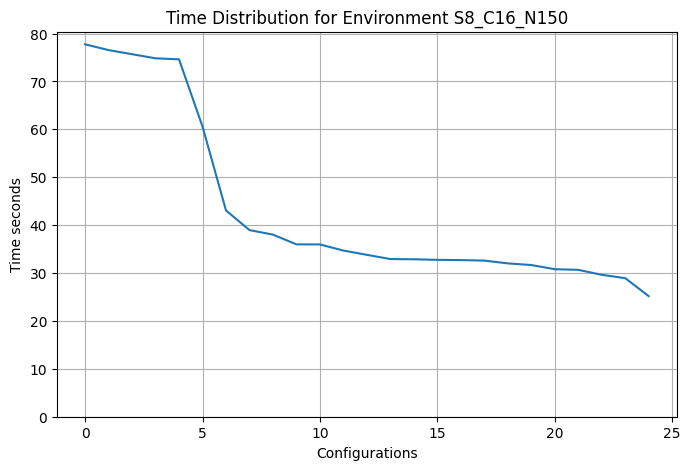

Max transfer time for env S8_C2_N150 :     91.426199
Average transfer time for env S8_C2_N150 : 56.245689320000004
Min transfer time for env S8_C2_N150 :     27.593484


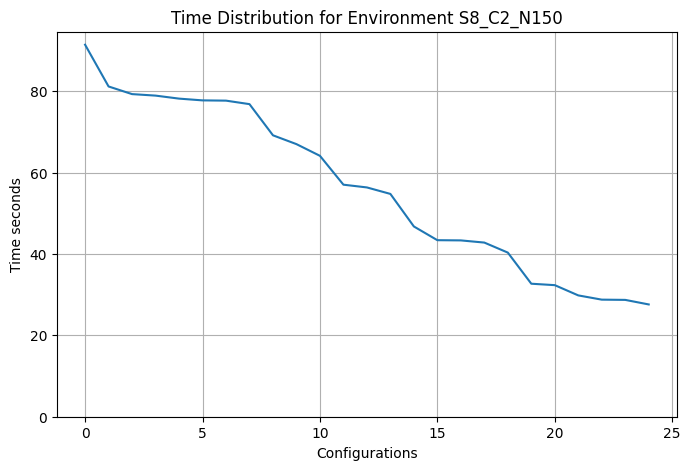

Max transfer time for env S8_C8_N150 :     78.340513
Average transfer time for env S8_C8_N150 : 43.000002125
Min transfer time for env S8_C8_N150 :     22.644006


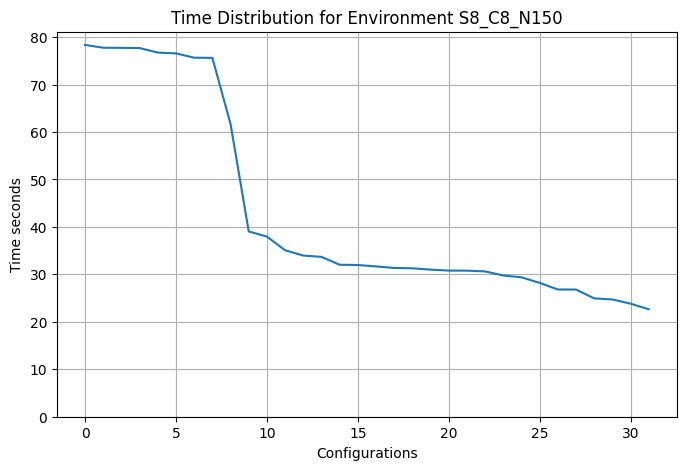

In [9]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from datetime import datetime, timedelta
import glob
import pandas as pd
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt

all_files = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results_10_5M/*/*/*.csv')

dict_env_df = {}

for file in all_files:
    df = pd.read_csv(file)

    env = file.split("\\")[-3]
    algo = file.split("\\")[-2]

    
    df = pd.read_csv(file)
    df = df[df['time'] > 1]
    if env not in dict_env_df.keys(): 
        dict_env_df[env] = []
    dict_env_df[env].append(df)

for env in dict_env_df.keys():
    
    all_data = pd.concat(dict_env_df[env], axis=0, ignore_index=True)
    
    all_data = all_data.sort_values(by='time',ascending=False).reset_index(drop=True)

    
    '''
    df = all_data

    #df.to_csv(f'C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/currated_datasets/{env}_currated_dataset.csv')

    
    lowest_time = df['time'].min()

    # Filter rows where 'time' is within 10% of the lowest value
    subset = df[df['time'] <= lowest_time * 1.20]
    
    # Check how many samples are currently available
    num_samples = len(subset)

    indices = np.linspace(0, len(subset) - 1, num=100, dtype=int)
    equally_sampled_subset = subset.iloc[indices].reset_index(drop=True)
    result = equally_sampled_subset



    all_data = result.sort_values(by='time',ascending=False).reset_index(drop=True)
    all_data = all_data.drop("Unnamed: 0",axis=1)
    all_data.to_csv(f'C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/currated_datasets/{env}_currated_dataset.csv', index=False)
    '''


    
    print(f"Max transfer time for env {env} :     {all_data['time'].max()}")
    print(f"Average transfer time for env {env} : {statistics.mean(all_data['time'])}")
    print(f"Min transfer time for env {env} :     {all_data['time'].min()}")
        
    plt.figure(figsize=(8, 5))
        
    plt.plot(all_data['time'])
    plt.grid()
    plt.xlabel('Configurations')
    plt.ylabel('Time seconds')
    plt.ylim(bottom=0)
    plt.title(f"Time Distribution for Environment {env}")# and Algorithm {algo}")
    plt.show()